# Pembuatan Chloropeth Map untuk Warisan Budaya Tak Benda di Indonesia

Ariq Hakim Ruswadi - 140810200001

## Import Libary

In [1]:
import geopandas as gpd
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

## Read SHF file

In [2]:
map = gpd.read_file('maps/BATAS_PROVINSI_DESEMBER_2019_DUKCAPIL.shp')

In [3]:
map.head()

,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,geometry
0,1,ACEH,27.455786,4.625436,"MULTIPOLYGON Z (((97.39178 2.03748 0.00003, 97..."
1,2,BALI,6.026646,0.458717,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ..."
2,3,BANTEN,9.282228,0.764911,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ..."
3,4,BENGKULU,11.706367,1.630129,"MULTIPOLYGON Z (((102.38616 -5.47144 0.00003, ..."
4,5,DAERAH ISTIMEWA YOGYAKARTA,3.342892,0.260130,"MULTIPOLYGON Z (((110.81980 -8.20358 0.00003, ..."


<AxesSubplot:>

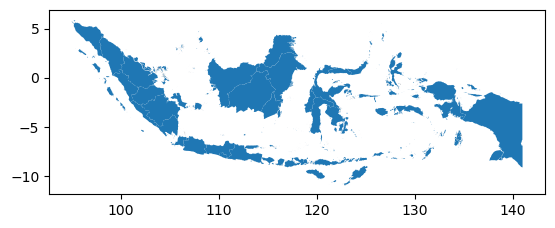

In [4]:
map.plot()

## Read data bersih

In [5]:
data = pd.read_csv('dataset/wbtb_mapper.csv', sep=';')

In [6]:
data.head()

,Pulau,Provinsi
0,Sumatra,ACEH
1,Bali dan Nusa Tenggara,BALI
2,Jawa,BANTEN
3,Sumatra,BENGKULU
4,Jawa,DAERAH ISTIMEWA YOGYAKARTA


In [7]:
data_pulau = pd.read_csv('dataset/wbtb_data.csv', sep=';')

In [8]:
data_pulau.head()

,Pulau,"Adat Istiadat Masyarakat, Ritus, dan Perayaan-Perayaan",Kemahiran dan Kerajinan Tradisional,Pengetahuan dan Kebiasaan Perilaku Mengenai Alam dan Semesta,Seni Pertunjukan,Tradisi dan Ekspresi Lisan
0,Bali dan Nusa Tenggara,332,313,56,346,177
1,Jawa,683,896,98,777,498
2,Kalimantan,392,352,154,321,407
3,Maluku dan Papua,143,513,194,173,183
4,Sulawesi,342,377,190,261,425


## Inisiasi Perhigungan dan Pewarnaan

In [9]:
index_pulau = {
    'Bali dan Nusa Tenggara' : 0,
    'Jawa' : 1,
    'Kalimantan': 2,
    'Maluku dan Papua': 3,
    'Sulawesi': 4,
    'Sumatra': 5
}

In [10]:
mean_plus_wbtb={
    'Adat Istiadat Masyarakat, Ritus, dan Perayaan-Perayaan': 612.9611953,
    'Kemahiran dan Kerajinan Tradisional': 829.8505833,
    'Pengetahuan dan Kebiasaan Perilaku Mengenai Alam dan Semesta':254.1127858,
    'Seni Pertunjukan' : 610.9037658,
    'Tradisi dan Ekspresi Lisan': 540.7932472
}

mean_min_wbtb={
    'Adat Istiadat Masyarakat, Ritus, dan Perayaan-Perayaan': 235.0388047,
    'Kemahiran dan Kerajinan Tradisional': 306.48275,
    'Pengetahuan dan Kebiasaan Perilaku Mengenai Alam dan Semesta':84.5538809,
    'Seni Pertunjukan' : 203.4295676,
    'Tradisi dan Ekspresi Lisan': 225.5400861
}

In [11]:
color = {
    'merah': '#ff0000',
    'kuning': '#ffff00',
    'hijau': '#00b050'
}

In [12]:
total_map = map
total_map['color'] = ''
total_map.head()

,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,geometry,color
0,1,ACEH,27.455786,4.625436,"MULTIPOLYGON Z (((97.39178 2.03748 0.00003, 97...",
1,2,BALI,6.026646,0.458717,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ...",
2,3,BANTEN,9.282228,0.764911,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ...",
3,4,BENGKULU,11.706367,1.630129,"MULTIPOLYGON Z (((102.38616 -5.47144 0.00003, ...",
4,5,DAERAH ISTIMEWA YOGYAKARTA,3.342892,0.260130,"MULTIPOLYGON Z (((110.81980 -8.20358 0.00003, ...",


In [13]:
def draw_map(map_data, str):
    colors = list()
    for index, row in map_data.iterrows():
        if(data_pulau.iloc[index_pulau[data.iloc[index]['Pulau']]][str] > mean_plus_wbtb[str]):
            colors.append(color['hijau'])
        elif(data_pulau.iloc[index_pulau[data.iloc[index]['Pulau']]][str] < mean_min_wbtb[str]):
            colors.append(color['merah'])
        else:
            colors.append(color['kuning'])

    return map_data.assign(color=colors)

## Pewarnaan WBTB Adat Istiadat Masyarakat, Ritus, dan Perayaan-Perayaan

<AxesSubplot:>

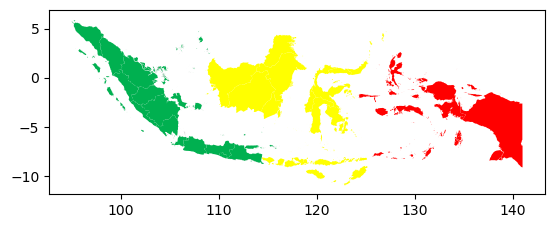

In [14]:
total_map = draw_map(total_map, 'Adat Istiadat Masyarakat, Ritus, dan Perayaan-Perayaan')
total_map.plot(color=total_map.color)

## Pewarnaan WBTB Kemahiran dan Kerajinan Tradisional

<AxesSubplot:>

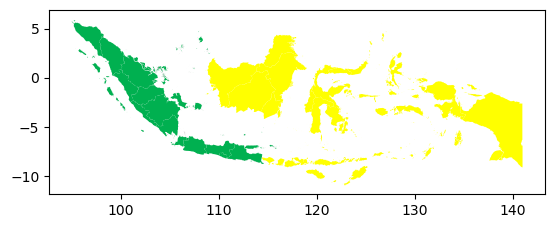

In [15]:
total_map = draw_map(total_map, 'Kemahiran dan Kerajinan Tradisional')
total_map.plot(color=total_map.color)

## Pewarnaan WBTB Pengetahuan dan Kebiasaan Perilaku Mengenai Alam dan Semesta

<AxesSubplot:>

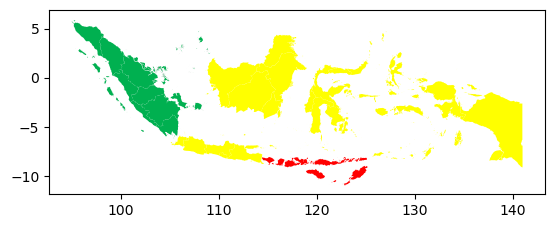

In [16]:
total_map = draw_map(total_map, 'Pengetahuan dan Kebiasaan Perilaku Mengenai Alam dan Semesta')
total_map.plot(color=total_map.color)

## Pewarnaan Seni Pertunjukan

<AxesSubplot:>

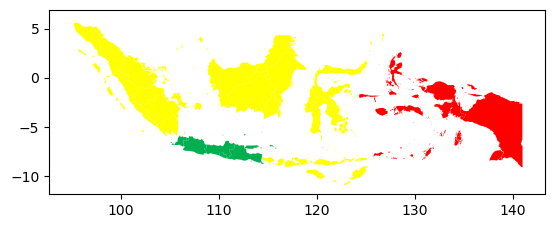

In [17]:
total_map = draw_map(total_map, 'Seni Pertunjukan')
total_map.plot(color=total_map.color)

## Pewarnaan Tradisi dan Ekspresi Lisan

<AxesSubplot:>

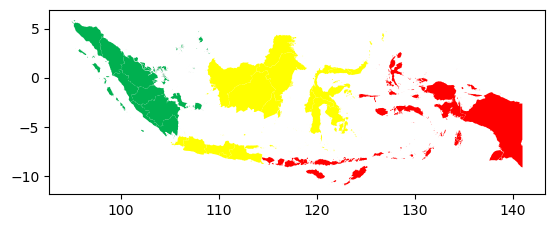

In [18]:
total_map = draw_map(total_map, 'Tradisi dan Ekspresi Lisan')
total_map.plot(color=total_map.color)